# Dataset load and one_hot coding

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
# Download the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)



Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


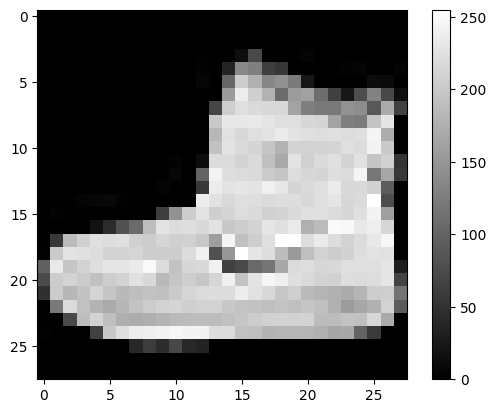

In [ ]:
# Visualization of the first image from the training dataset
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
# Normalize pixel values ​​to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Changing the shape of images to match the input Conv2D format
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# Splitting the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Converting labels to one-hot encoding format
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


# Building and training a model with Batch Normalization

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.BatchNormalization(),  # Замінюємо Dropout на BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_2 (Gl  (None, 64)               

In [ ]:
# Training a model with a validation set
model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))


Epoch 1/15
1500/1500 [==============================] - 54s 34ms/step - loss: 0.4680 - accuracy: 0.8325 - val_loss: 0.3563 - val_accuracy: 0.8683
Epoch 2/15
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3272 - accuracy: 0.8798 - val_loss: 0.4056 - val_accuracy: 0.8577
Epoch 3/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2828 - accuracy: 0.8956 - val_loss: 0.3080 - val_accuracy: 0.8880
Epoch 4/15
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2556 - accuracy: 0.9063 - val_loss: 0.3059 - val_accuracy: 0.8898
Epoch 5/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2332 - accuracy: 0.9139 - val_loss: 0.3326 - val_accuracy: 0.8848
Epoch 6/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2144 - accuracy: 0.9204 - val_loss: 0.2782 - val_accuracy: 0.9036
Epoch 7/15
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2024 - accuracy: 0.9244 - val_loss: 0.2952 -

In [ ]:
# Model evaluation on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 4s - loss: 0.3119 - accuracy: 0.9021 - 4s/epoch - 12ms/step

Test accuracy: 0.9021000266075134


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Getting predictions for test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Getting the class index for each image
true_classes = np.argmax(test_labels, axis=1)

# Generation classification report
report = classification_report(true_classes, predicted_classes)

print(report)


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.77      0.92      0.83      1000
           3       0.89      0.94      0.91      1000
           4       0.88      0.79      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.76      0.70      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Model saving
model.save("fashion_mnist_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Building a model with Dropout

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_1.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 52s 34ms/step - loss: 0.6612 - accuracy: 0.7614 - val_loss: 0.4267 - val_accuracy: 0.8455
Epoch 2/15
1500/1500 [==============================] - 78s 52ms/step - loss: 0.4364 - accuracy: 0.8422 - val_loss: 0.3621 - val_accuracy: 0.8665
Epoch 3/15
1500/1500 [==============================] - 73s 49ms/step - loss: 0.3791 - accuracy: 0.8609 - val_loss: 0.3434 - val_accuracy: 0.8749
Epoch 4/15
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3493 - accuracy: 0.8747 - val_loss: 0.3168 - val_accuracy: 0.8819
Epoch 5/15
1500/1500 [==============================] - 89s 60ms/step - loss: 0.3257 - accuracy: 0.8823 - val_loss: 0.3139 - val_accuracy: 0.8851
Epoch 6/15
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3064 - accuracy: 0.8886 - val_loss: 0.2936 - val_accuracy: 0.8903
Epoch 7/15
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2855 - accuracy: 0.8951 - val_loss: 0.2935 -

In [ ]:
# Obtaining predictions for training and test data
test_predictions = model_1.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 7s 24ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.88      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.68      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Model saving
model.save("fashion_mnist_model_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Building a model without convolution and pooling layers, without regularization, using a rectification layer and inner layers

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_2.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5141 - accuracy: 0.8185 - val_loss: 0.4324 - val_accuracy: 0.8451
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3876 - accuracy: 0.8603 - val_loss: 0.3883 - val_accuracy: 0.8603
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3474 - accuracy: 0.8720 - val_loss: 0.3685 - val_accuracy: 0.8645
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3192 - accuracy: 0.8840 - val_loss: 0.3600 - val_accuracy: 0.8703
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3008 - accuracy: 0.8887 - val_loss: 0.3322 - val_accuracy: 0.8837
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2849 - accuracy: 0.8942 - val_loss: 0.3346 - val_accuracy: 0.8802
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2741 - accuracy: 0.8976 - val_loss: 0.3332 - val_accuracy:

In [ ]:
test_predictions = model_2.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.83      0.79      1000
           3       0.93      0.85      0.89      1000
           4       0.82      0.75      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.70      0.67      0.68      1000
           7       0.92      0.97      0.95      1000
           8       0.99      0.94      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Model saving
model.save("fashion_mnist_model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Network construction with the RMSprop optimizer

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_3.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_3.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5247 - accuracy: 0.8142 - val_loss: 0.4296 - val_accuracy: 0.8424
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3883 - accuracy: 0.8602 - val_loss: 0.3671 - val_accuracy: 0.8692
Epoch 3/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3499 - accuracy: 0.8738 - val_loss: 0.3754 - val_accuracy: 0.8643
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3279 - accuracy: 0.8834 - val_loss: 0.3506 - val_accuracy: 0.8769
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3132 - accuracy: 0.8871 - val_loss: 0.3773 - val_accuracy: 0.8737
Epoch 6/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3044 - accuracy: 0.8918 - val_loss: 0.3713 - val_accuracy: 0.8767
Epoch 7/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2925 - accuracy: 0.8960 - val_loss: 0.3498 - val_accur

In [ ]:
test_predictions = model_3.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.97      0.98      0.97      1000
           2       0.80      0.77      0.78      1000
           3       0.94      0.82      0.87      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.66      0.72      0.69      1000
           7       0.95      0.94      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Model saving
model.save("fashion_mnist_model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Conclusion: during the creation and training of the network, I found out that the best result was obtained when using several repetitions of the convolution and maxpooling layers. As a regularization, the early stop algorithm performed better than the dropout algorithm. The best optimizer was Adam. By the number of epochs, it seemed to me that in 10 epochs, the network does not have time to learn, so I took 15 epochs, and for the comparability of the created networks, I took 15 epochs everywhere.